Parte 1


# Importações

In [144]:
import pandas as pd
import dataframe_image as dfi
import numpy as np 
import matplotlib.pyplot as plt
import sklearn
from sklearn.neural_network import MLPClassifier
from sklearn.neural_network import MLPRegressor

# Import necessary modules
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn.metrics import r2_score
from sklearn.neural_network import MLPClassifier

import six


Dados de treino e target:

1.0
[-1  1  1 -1]
[0.7064284781021825, 0.6518305047561089, 0.6103481741784271, 0.5850530017832115, 0.5675550585426526, 0.5509246495961687, 0.5338212128152879, 0.5169081037597504, 0.5010088240502281, 0.48617801268805116, 0.4719563205365981, 0.4579933930754938, 0.44398590572265645, 0.4296150715745025, 0.4145826378735099, 0.3986675120874363, 0.381801625306577, 0.36407976839529194, 0.34560653824757, 0.32654103998206285, 0.30712680722785646, 0.2876068150378964, 0.2680597724905402, 0.24847564889434157, 0.2290469863551747, 0.21016422937679724, 0.19217269353876026, 0.17530664025111922, 0.1597491625828151, 0.14561388712511167, 0.13291315010907698, 0.12158468792729926, 0.1115338381052437, 0.10265074127022093, 0.09481337451003781, 0.08789401654728282, 0.08176950030862065, 0.07632907455493518, 0.07147738980987874, 0.06713387607513577, 0.06323061904382028, 0.059710138816636144, 0.05652360207404915, 0.05362947518784003, 0.05099245904730054, 0.048582571903129895, 0.04637431948331694, 0.04434594361921

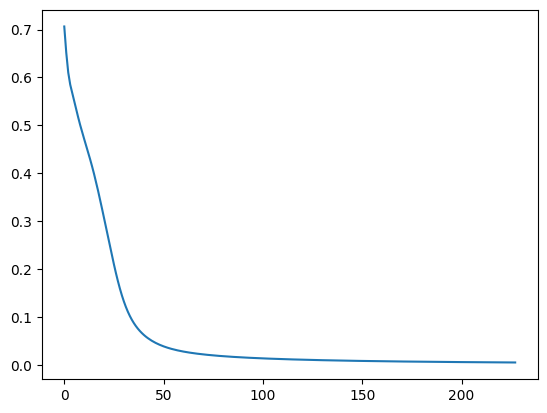

In [145]:
training_data = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
target_data = np.array([-1, 1, 1, -1])
targetdois_data = np.array([0, 1, 1, 0])


mlp = MLPClassifier(hidden_layer_sizes=(4, 2), activation='tanh',  max_iter=10000, alpha=0.0001, shuffle=False, momentum=0, learning_rate_init=0.05, n_iter_no_change=100)
mlp.fit(training_data, target_data)
print(mlp.score(training_data, target_data))
print(mlp.predict(training_data))
plt.plot(mlp.loss_curve_)
print(mlp.loss_curve_)
print(len(mlp.loss_curve_))

#https://stackoverflow.com/questions/26678467/export-a-pandas-dataframe-as-a-table-image
def render_mpl_table(data, col_width=3.0, row_height=0.625, font_size=14,
                     header_color='#40466e', row_colors=['#f1f1f2', 'w'], edge_color='w',
                     bbox=[0, 0, 1, 1], header_columns=0,
                     ax=None, **kwargs):
    if ax is None:
        size = (np.array(data.shape[::-1]) + np.array([0, 1])) * np.array([col_width, row_height])
        fig, ax = plt.subplots(figsize=size)
        plt.savefig('mytable1.png')
        ax.axis('off')

    mpl_table = ax.table(cellText=data.values, bbox=bbox, colLabels=data.columns, **kwargs)

    mpl_table.auto_set_font_size(False)
    mpl_table.set_fontsize(font_size)

    for k, cell in  six.iteritems(mpl_table._cells):
        cell.set_edgecolor(edge_color)
        if k[0] == 0 or k[1] < header_columns:
            cell.set_text_props(weight='bold', color='w')
            cell.set_facecolor(header_color)
        else:
            cell.set_facecolor(row_colors[k[0]%len(row_colors) ])
    return ax

## Ex 1a

Justificar o pq de ter usado tangente e não logistica (pq uso no target -1 e 1), se for logistic os valores do target tem que ser entre 0 e 1

Empty DataFrame
Columns: [Execução, r = 0.05, r = 0.25, r = 0.5, r = 1, r = 2]
Index: []


,Execução,r = 0.05,r = 0.25,r = 0.5,r = 1,r = 2
0,1,NA,NA,NA,121,39
1,2,NA,NA,NA,102,142
2,3,NA,NA,NA,91,52
3,4,NA,NA,NA,289,46
4,5,NA,518,150,55,NA
5,6,NA,NA,NA,87,58
6,7,NA,NA,126,NA,124
7,8,1706,341,126,174,38
8,9,NA,475,NA,83,NA
9,10,NA,NA,NA,NA,47


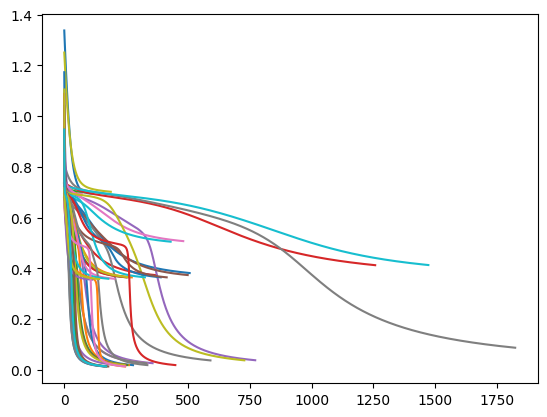

In [146]:
data = [[1, 0, 0, 0, 0, 0], 
        [1, 0, 0, 0, 0, 0], 
        [1, 0, 0, 0, 0, 0], 
        [1, 0, 0, 0, 0, 0], 
        [1, 0, 0, 0, 0, 0], 
        [1, 0, 0, 0, 0, 0], 
        [1, 0, 0, 0, 0, 0], 
        [1, 0, 0, 0, 0, 0], 
        [1, 0, 0, 0, 0, 0], 
        [1, 0, 0, 0, 0, 0]]





        
df_ex1a = pd.DataFrame(columns=['Execução', 'r = 0.05', 'r = 0.25','r = 0.5', 'r = 1', 'r = 2'])
print(df_ex1a)

for learning_rate_value in [0.05, 0.25, 0.5, 1, 2]:
    for i in range(10):
        mlp = MLPClassifier(hidden_layer_sizes=(2, ), activation='tanh', solver="sgd", max_iter=10000, shuffle=False, momentum=0, learning_rate_init=learning_rate_value)
        mlp.fit(training_data, target_data)
        score_result = mlp.score(training_data, target_data)
        predict_result = mlp.predict(training_data)
        losscurve = mlp.loss_curve_
        plt.plot(mlp.loss_curve_)
        score_valuecurvebelow_threshold = "NA"
        for z in range(len(losscurve)):
                if (losscurve[z] <= 0.1):
                        score_valuecurvebelow_threshold = str(z+1)
                        break
        df_ex1a.at[i,"Execução"] = str(i+1)
        df_ex1a.at[i,"r = " + str(learning_rate_value) + ""] = score_valuecurvebelow_threshold

df_ex1a
#render_mpl_table(df_ex1a, header_columns=0, col_width=3.0)



Empty DataFrame
Columns: [Execução, r = 0.05, r = 0.25, r = 0.5, r = 1, r = 2]
Index: []


,Execução,r = 0.05,r = 0.25,r = 0.5,r = 1,r = 2
0,1,NA,NA,NA,NA,NA
1,2,NA,NA,NA,NA,NA
2,3,NA,NA,NA,NA,NA
3,4,NA,NA,NA,NA,NA
4,5,NA,NA,NA,NA,NA
5,6,NA,NA,NA,NA,NA
6,7,NA,NA,NA,NA,NA
7,8,NA,NA,NA,NA,NA
8,9,NA,NA,NA,NA,NA
9,10,NA,NA,NA,NA,NA


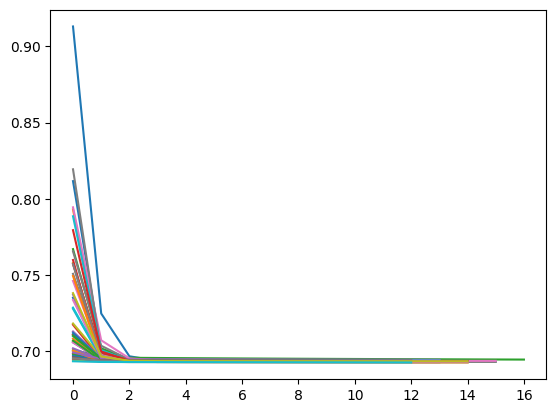

In [147]:
data = [[1, 0, 0, 0, 0, 0], 
        [1, 0, 0, 0, 0, 0], 
        [1, 0, 0, 0, 0, 0], 
        [1, 0, 0, 0, 0, 0], 
        [1, 0, 0, 0, 0, 0], 
        [1, 0, 0, 0, 0, 0], 
        [1, 0, 0, 0, 0, 0], 
        [1, 0, 0, 0, 0, 0], 
        [1, 0, 0, 0, 0, 0], 
        [1, 0, 0, 0, 0, 0]]





        
df_ex1a2 = pd.DataFrame(columns=['Execução', 'r = 0.05', 'r = 0.25','r = 0.5', 'r = 1', 'r = 2'])
print(df_ex1a2)

for learning_rate_value2 in [0.05, 0.25, 0.5, 1, 2]:
    for i in range(10):
        mlp2 = MLPClassifier(hidden_layer_sizes=(2, ), activation='logistic', solver="sgd", max_iter=10000, shuffle=False, momentum=0, learning_rate_init=learning_rate_value)
        mlp2.fit(training_data, targetdois_data)
        #score_result = mlp2.score(training_data, targetdois_data)
        #predict_result = mlp2.predict(training_data)
        losscurve2 = mlp2.loss_curve_
        plt.plot(mlp2.loss_curve_)
        score_valuecurvebelow_threshold = "NA"
        for z in range(len(losscurve2)):
                if (losscurve2[z] <= 0.1):
                        score_valuecurvebelow_threshold = str(z+1)
                        break
        df_ex1a2.at[i,"Execução"] = str(i+1)
        df_ex1a2.at[i,"r = " + str(learning_rate_value2) + ""] = score_valuecurvebelow_threshold

df_ex1a2
#render_mpl_table(df_ex1a, header_columns=0, col_width=3.0)

